<a href="https://colab.research.google.com/github/JingfengSteven/NAM_trail/blob/trail_1/trial_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
!git clone https://github.com/JingfengSteven/givemesomecredit

Cloning into 'givemesomecredit'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), 4.39 MiB | 2.81 MiB/s, done.


In [1]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
from givemesomecredit import models as nam_models
from givemesomecredit import graph_builder
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from typing import Union, List
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import log_loss
class SAEModel(tf.keras.Model):
    # 可以传入一些超参数，用以动态构建模型
    # __init__()方法在创建模型对象时被调用
    def __init__(self, input_shape, hidden_shape=None):
        # 隐藏层节点个数默认为输入层的3倍
        if hidden_shape == None:
            hidden_shape = 3 * input_shape
        # 调用父类__init__()方法
        super(SAEModel, self).__init__()

        self.layer_1 = tf.keras.layers.Dense(10,use_bias=False,
        trainable=True)
        self.layer_2 = tf.keras.layers.Dense(
        1,
        activation="sigmoid",
        use_bias=False,
        trainable=True)

    def call(self, input_tensor, training=False):
        # 输入数据
        hidden = self.layer_1(input_tensor)
        output = self.layer_2(hidden)
        return output

    # 计算损失值
    def get_loss(self, input_tensor,true_value):
        hidden = self.layer_1(input_tensor)
        output = self.layer_2(hidden)
       # print(output)
        output=tf.reshape(output, [6700])
        true_value=tf.cast(true_value,tf.float32)
        tf.multiply(output,true_value)

        BCE=-tf.reduce_sum(tf.multiply(tf.math.log(output+0.00001),true_value)+tf.multiply((1-true_value),tf.math.log(1-output+0.00001)))/6700


       #  计算权重乘法项
      #  alpha = 0.1
      #  W1 = self.layer_1.kernel
    #    W2 = self.layer_2.kernel
     #   weightPunish = (alpha / 2) * (tf.reduce_sum(W1) + tf.reduce_sum(W2))
        ans = tf.constant(BCE)
        print(ans)
        return ans

    def get_grad(self, input_tensor,true_value):
        with tf.GradientTape() as tape:
            tape.watch(self.variables)
            L = self.get_loss(input_tensor,true_value)
            g = tape.gradient(L, self.variables)
        return g

    def network_learn(self, input_tensor,true_value):
        g = self.get_grad(input_tensor,true_value)
        tf.keras.optimizers.Adam().apply_gradients(zip(g, self.variables))

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn
orgdata=pd.read_csv("cs-training.csv")
orgdata=orgdata.dropna(axis=0)
orgdata.head()
class1=orgdata[orgdata['SeriousDlqin2yrs'] == 1]
class0=orgdata[orgdata['SeriousDlqin2yrs'] == 0]
class0=class0[0:5000]
class1=class1[0:5000]
data=pd.concat([class0,class1],axis=0)
data=np.array(data)
x=data[:,2:12]
y=data[:,1]
x_train=x
y_train=y
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
X_train, X_test, Y_train, Y_test = train_test_split(
      x_train, y_train, test_size=0.33, random_state=42)
X_train=tf.cast(X_train,tf.double)
Y_train=tf.cast(Y_train,tf.double)

In [6]:
#saeModel = SAEModel(X_train.shape[-1], 5)
for i in range(3000):
	saeModel.network_learn(tf.constant(X_train),tf.constant(Y_train))


tf.Tensor(0.6319795, shape=(), dtype=float32)
tf.Tensor(0.63191086, shape=(), dtype=float32)
tf.Tensor(0.6318385, shape=(), dtype=float32)
tf.Tensor(0.6317698, shape=(), dtype=float32)
tf.Tensor(0.6316974, shape=(), dtype=float32)
tf.Tensor(0.6316287, shape=(), dtype=float32)
tf.Tensor(0.6315562, shape=(), dtype=float32)
tf.Tensor(0.6314875, shape=(), dtype=float32)
tf.Tensor(0.63141507, shape=(), dtype=float32)
tf.Tensor(0.6313462, shape=(), dtype=float32)
tf.Tensor(0.63127375, shape=(), dtype=float32)
tf.Tensor(0.631205, shape=(), dtype=float32)
tf.Tensor(0.6311324, shape=(), dtype=float32)
tf.Tensor(0.63106364, shape=(), dtype=float32)
tf.Tensor(0.63099116, shape=(), dtype=float32)
tf.Tensor(0.6309223, shape=(), dtype=float32)
tf.Tensor(0.6308496, shape=(), dtype=float32)
tf.Tensor(0.6307808, shape=(), dtype=float32)
tf.Tensor(0.6307082, shape=(), dtype=float32)
tf.Tensor(0.6306394, shape=(), dtype=float32)
tf.Tensor(0.6305668, shape=(), dtype=float32)
tf.Tensor(0.6304979, shape=(),

In [7]:
saeModel.call(tf.constant(X_train))

<tf.Tensor: shape=(6700, 1), dtype=float32, numpy=
array([[0.7417123 ],
       [0.36656672],
       [0.9887231 ],
       ...,
       [0.30578953],
       [0.31349078],
       [0.970897  ]], dtype=float32)>

In [9]:
import matplotlib.pyplot as plt

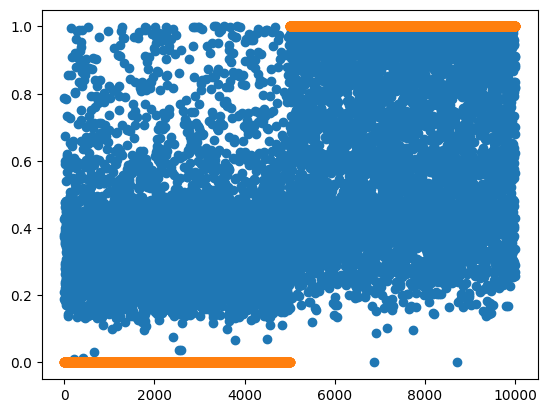

In [10]:
y_pred=np.array(saeModel(x_train))
x=np.arange(10000)
plt.scatter(x,y_pred)
plt.scatter(x,y_train)